In [1]:
from read_data import *
from hyper import *
from alignment import *
from datasets.preprecossing import *

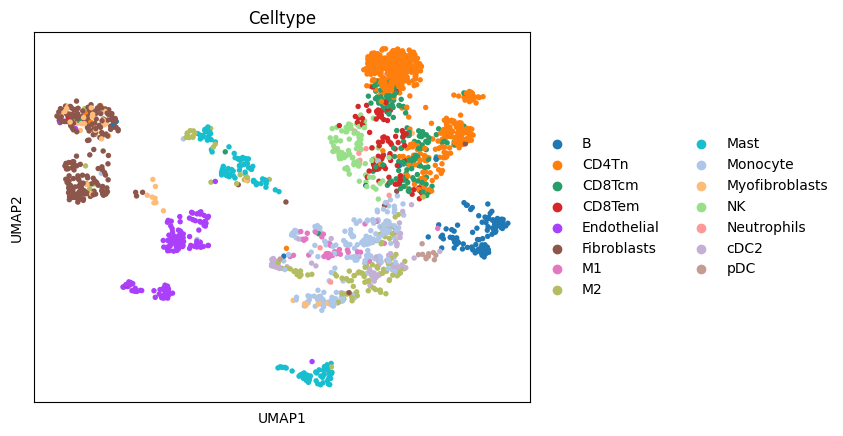

In [2]:
adata1 = sc.read("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_expression_processed.h5ad")
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_expression_processed.h5ad") 
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
cell_type1 = pd.read_csv("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_CellMetainfo_table.tsv",sep="\t")
# cell_type2 = pd.read_csv("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_CellMetainfo_table.tsv",sep='\t');
adata1.obs.loc[list(cell_type1['Cell']), 'Celltype'] = list(cell_type1['Celltype (minor-lineage)'])
# adata2.obs.loc[list(cell_type2['Cell']), 'Celltype'] = list(cell_type2['Celltype (minor-lineage)'])

# preprocessing()
adata2 = sc.pp.subsample(adata1,fraction = 0.1)
adata2
sc.pl.umap(adata1, color="Celltype")

In [3]:
adata1.obs

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,n_genes,leiden,Celltype
BC06TUMOR3_44172,48,2668.951749,1731,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1731,11,M2
BC03NORMAL2_9396,24,2631.481413,1417,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1417,17,Endothelial
BC05TUMOR3_96353,44,2820.517580,1783,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1783,4,Monocyte
BC04BLOOD1_42242,29,1508.587816,577,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,577,0,CD4Tn
BC07TUMOR3_77427,50,1780.527139,772,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,772,10,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC04TUMOR1_5874,36,1657.176053,626,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,626,9,Endothelial
BC04BLOOD6_17631,34,1371.152792,511,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,511,0,CD4Tn
BC04TUMOR1_5443,36,1635.877103,668,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,668,20,Myofibroblasts
BC04TUMOR2_22636,37,1666.975548,704,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,704,8,Fibroblasts


In [4]:
from scipy.spatial import distance_matrix

matrixs = []
for i in cell_type1['Celltype (minor-lineage)'].unique():
    print(i)
    matrix1 = pd.DataFrame(distance_matrix(adata1.to_df()[adata1.obs['Celltype']==i].values,adata1.to_df()[adata1.obs['Celltype']==i].values))
    matrixs.append(matrix1)
    
list_matrix = []
for m in matrixs:
    list_matrix.append(m.values.reshape(-1).tolist())


B
CD4Tn
CD8Tcm
CD8Tem
cDC2
pDC
Endothelial
Fibroblasts
Mast
Monocyte
M1
M2
Myofibroblasts
Neutrophils
NK


In [5]:
from scipy.spatial import distance_matrix

matrixs2 = []
for i in cell_type1['Celltype (minor-lineage)'].unique():
    print(i)
    matrix2 = pd.DataFrame(distance_matrix(adata1.to_df()[adata1.obs['Celltype']==i].values,adata1.to_df()[adata1.obs['Celltype']!=i].values))
    matrixs2.append(matrix2)
    
list_matrix2 = []
for m in matrixs2:
    list_matrix2.append(m.values.reshape(-1).tolist())
list_matrix2

B
CD4Tn
CD8Tcm
CD8Tem
cDC2
pDC
Endothelial
Fibroblasts
Mast
Monocyte
M1
M2
Myofibroblasts
Neutrophils
NK


[[11.304687077868467,
  12.697613605891545,
  10.394380906987346,
  12.382261563363047,
  12.307938867936638,
  10.399889399196294,
  14.513576538473654,
  15.099039188453496,
  10.160675834124353,
  12.51259749319706,
  12.72970386085948,
  11.296146687193906,
  10.929855376175798,
  12.189145149441051,
  14.400606769822945,
  13.869574428774488,
  13.613352122366793,
  14.048378502699808,
  15.236333955575418,
  13.470076513814563,
  12.123614506117784,
  13.077564479186508,
  12.878419854083608,
  12.565877311287526,
  10.489144414205114,
  12.118588957074158,
  12.485561538651144,
  13.643083654682197,
  11.002096896276516,
  13.5453634529088,
  13.328251669391026,
  11.908693883040822,
  10.647849861368215,
  15.605154318065892,
  13.669205604243924,
  13.313705605304484,
  11.609470381391365,
  11.851939682042211,
  11.230408171639407,
  13.602688698786286,
  11.461741053346616,
  12.922312980217672,
  13.969404964067287,
  12.561401663468427,
  12.344131766543944,
  12.635314665

In [6]:
from itertools import chain 
list(chain(*list_matrix)) 

[0.0,
 15.832623998646243,
 12.38223275214038,
 12.892614655692196,
 12.4255570344898,
 12.851567180001704,
 11.661320515439687,
 12.594726047188983,
 10.96127359722504,
 12.746075014916284,
 12.084588968870372,
 12.365331333712298,
 11.784980775609736,
 11.980667022140938,
 11.564734719809323,
 11.504272650003324,
 12.438984511183,
 12.781599114216684,
 11.763849760102488,
 11.18437653624494,
 13.581419589344762,
 11.309027640268495,
 12.790095823260229,
 12.23985413070791,
 10.89914599382335,
 14.83647372146998,
 12.602953427834747,
 13.069204556653796,
 12.847436904253476,
 11.64193142120869,
 12.203681574497413,
 12.675646494319675,
 12.197375908251365,
 13.060431892804484,
 12.14426623617268,
 12.14923733590443,
 12.86769250884233,
 13.918701138724959,
 11.708167468575548,
 11.63654238086371,
 12.42035233994853,
 12.06538783830014,
 11.921683840082116,
 12.856134308822945,
 11.297568238436352,
 12.270123897996301,
 11.303094885743944,
 12.063557058937432,
 12.837609513858409,
 11.

In [9]:
np.array(list_matrix)
1

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_47141/1105484429.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(list_matrix)


1

In [10]:
np.array(list(chain(*list_matrix2))).min()

3.2806570308425895

<AxesSubplot:ylabel='Density'>

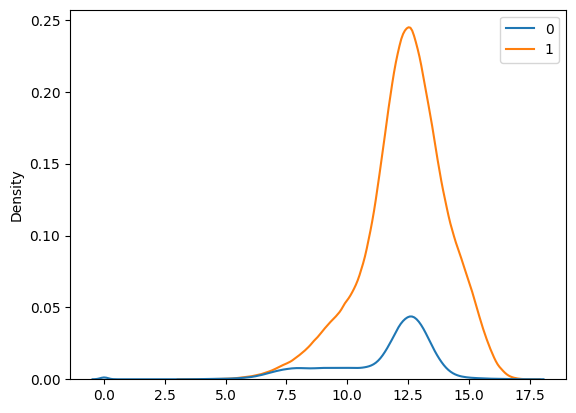

In [13]:
import seaborn as sns
sns.kdeplot([list(chain(*list_matrix)),list(chain(*list_matrix2)) ])

In [14]:
from scipy.spatial import KDTree

r=5
now = adata1.to_df().values
labels = adata1.obs['Celltype'].tolist();
total = 0;
tree=  KDTree(now)
for i in range(1000):
    rnd = np.random.randint(now.shape[0], size=1)
    rand_choice = now[rnd, :].reshape(-1)
    indices = tree.query_ball_point(rand_choice,r)
    for l in indices:
        if(labels[int(rnd)] != labels[l]):
            total+=1
    # break
# rand_choice.shape
# total,len(indices)
print(total/1000)

161.61


In [ ]:
from scipy.spatial import KDTree

r=10
now = adata1.to_df().values
labels = adata1.obs['Celltype'].tolist();
total = 0;
tree=  KDTree(now)
for i in range(10000):
    rnd = np.random.randint(now.shape[0], size=1)
    rand_choice = now[rnd, :].reshape(-1)
    indices = tree.query_ball_point(rand_choice,r)
    for l in indices:
        if(labels[int(rnd)] != labels[l]):
            total+=1
    # break
# rand_choice.shape
# total,len(indices)
print(total/10000)

In [ ]:
import seaborn as sns
sns.kdeplot([np.array(list_matrix).reshape(1,-1).tolist(),np.array(list_matrix2).reshape(1,-1).tolist()])

In [ ]:
contain.T

In [ ]:
import seaborn as sns
sns.kdeplot(contain.T)

In [ ]:
matrixs[0]

In [ ]:
adata1.to_df()[adata1.obs['Celltype']=='B'].values

In [ ]:
adata1.obs[adata1.obs['Celltype']=='B'].index.tolist()[0]

In [ ]:
datas = pd.read_csv("./datas/data1/data_cell.csv").set_index("Unnamed: 0")
datas

In [ ]:
datas[list(adata1.obs[adata1.obs['Celltype']=='B'].index)]

In [ ]:
datas[adata1.obs[adata1.obs['Celltype']=='B'].index.tolist()]

In [ ]:
adata1 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_expression_processed.h5ad") 
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
cell_type1 = pd.read_csv("../../../capital/docs/tutorials/BRCA_EMTAB8107_CellMetainfo_table.tsv",sep="\t")
# cell_type2 = pd.read_csv("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_CellMetainfo_table.tsv",sep='\t');
adata1.obs.loc[list(cell_type1['Cell']), 'Celltype'] = list(cell_type1['Celltype (minor-lineage)'])
# adata2.obs.loc[list(cell_type2['Cell']), 'Celltype'] = list(cell_type2['Celltype (minor-lineage)'])

# preprocessing()
adata2 = sc.pp.subsample(adata1,fraction = 0.5)
adata2
sc.pl.umap(adata1, color="Celltype")
from scipy.spatial import distance_matrix

matrixs = []
for i in cell_type1['Celltype (minor-lineage)'].unique():
    print(i)
    matrix1 = pd.DataFrame(distance_matrix(adata1.to_df()[adata1.obs['Celltype']==i].values,adata1.to_df()[adata1.obs['Celltype']==i].values))
    matrixs.append(matrix1)
    
list_matrix = []
for m in matrixs:
    list_matrix.append(m.values.reshape(-1).tolist())
from scipy.spatial import distance_matrix

matrixs2 = []
for i in cell_type1['Celltype (minor-lineage)'].unique():
    print(i)
    matrix2 = pd.DataFrame(distance_matrix(adata1.to_df()[adata1.obs['Celltype']==i].values,adata1.to_df()[adata1.obs['Celltype']!=i].values))
    matrixs2.append(matrix2)
    
list_matrix2 = []
for m in matrixs2:
    list_matrix2.append(m.values.reshape(-1).tolist())
list_matrix2
import seaborn as sns
sns.kdeplot([list(chain(*list_matrix)),list(chain(*list_matrix2)) ])